In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
import itertools

In [2]:
# データの読み込み
data = pd.read_csv('./newly_confirmed_cases_daily.csv', index_col='Date', parse_dates=True)
data.index = pd.DatetimeIndex(data.index.values, freq=data.index.inferred_freq)
data

,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
2020-01-16,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-15,108185,1913,538,568,1607,409,535,1237,3239,1619,...,1391,597,6117,1067,1500,1951,1280,1467,2051,814
2023-01-16,54416,1013,329,351,889,163,214,708,2614,659,...,601,317,2007,435,463,849,973,710,1176,433
2023-01-17,126989,3129,951,1123,1745,726,720,1936,931,2136,...,2407,980,6339,1348,1907,3014,1396,2078,2380,965
2023-01-18,125108,2645,706,833,1799,507,721,1761,3437,1798,...,1374,657,6473,1065,1476,2018,1519,1447,1948,706


In [3]:
#愛知のデータのみ抽出
data_aichi = data['Aichi']
data_aichi

2020-01-16        0
2020-01-17        0
2020-01-18        0
2020-01-19        0
2020-01-20        0
              ...  
2023-01-15     6866
2023-01-16     2234
2023-01-17    10668
2023-01-18     8573
2023-01-19     6378
Freq: D, Name: Aichi, Length: 1100, dtype: int64

## データの可視化・分解

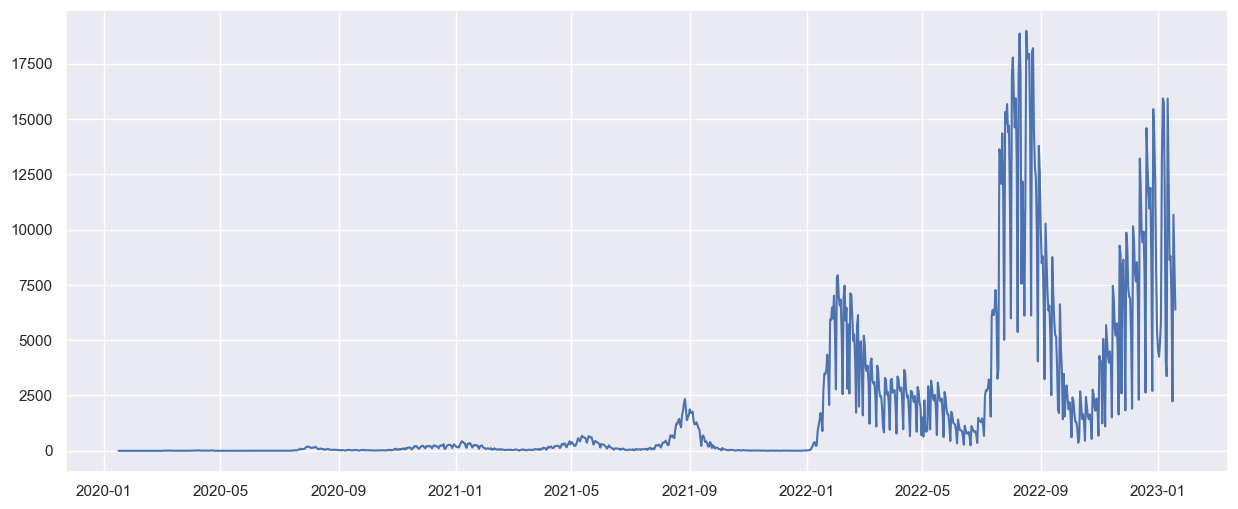

In [4]:
plt.plot(data_aichi)
plt.show()

## 自己相関係数・変自己相関係数

c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


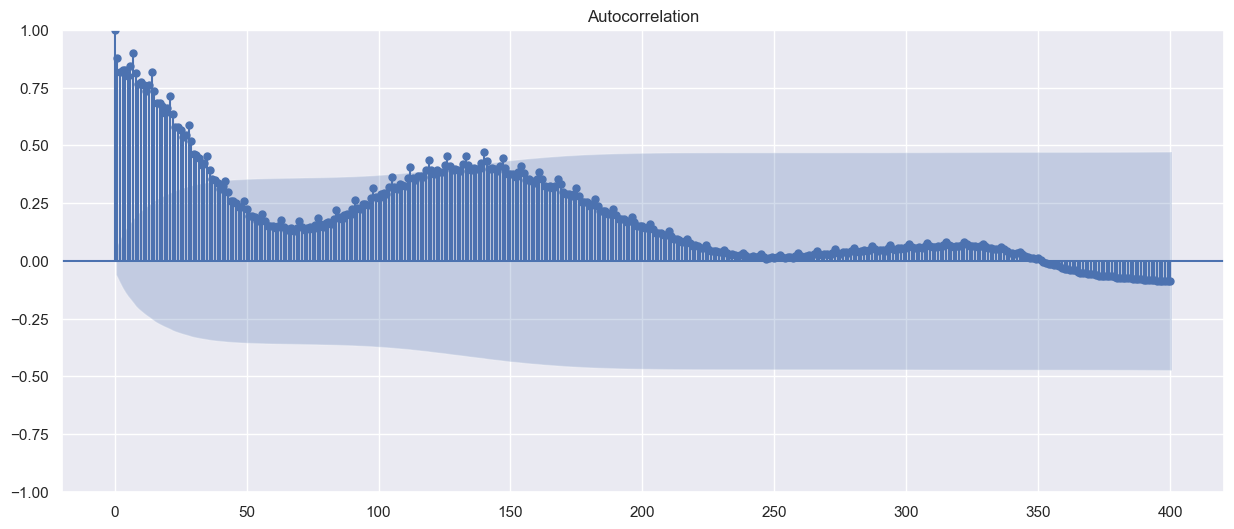

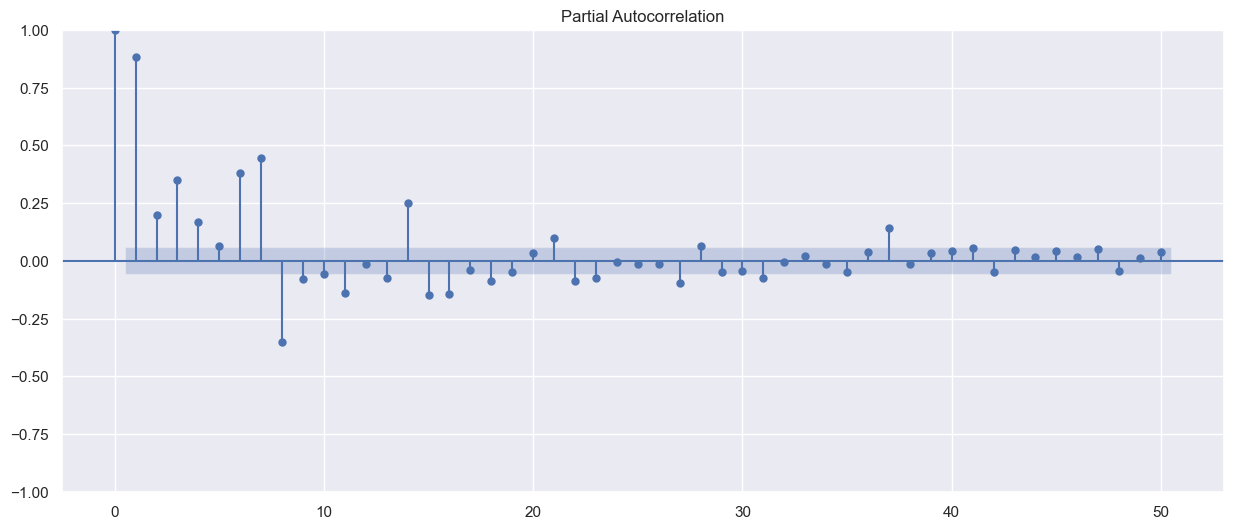

In [5]:
fig_1 = sm.graphics.tsa.plot_acf(data_aichi, lags=400)
fig_2 = sm.graphics.tsa.plot_pacf(data_aichi, lags=50)

## 波状分解

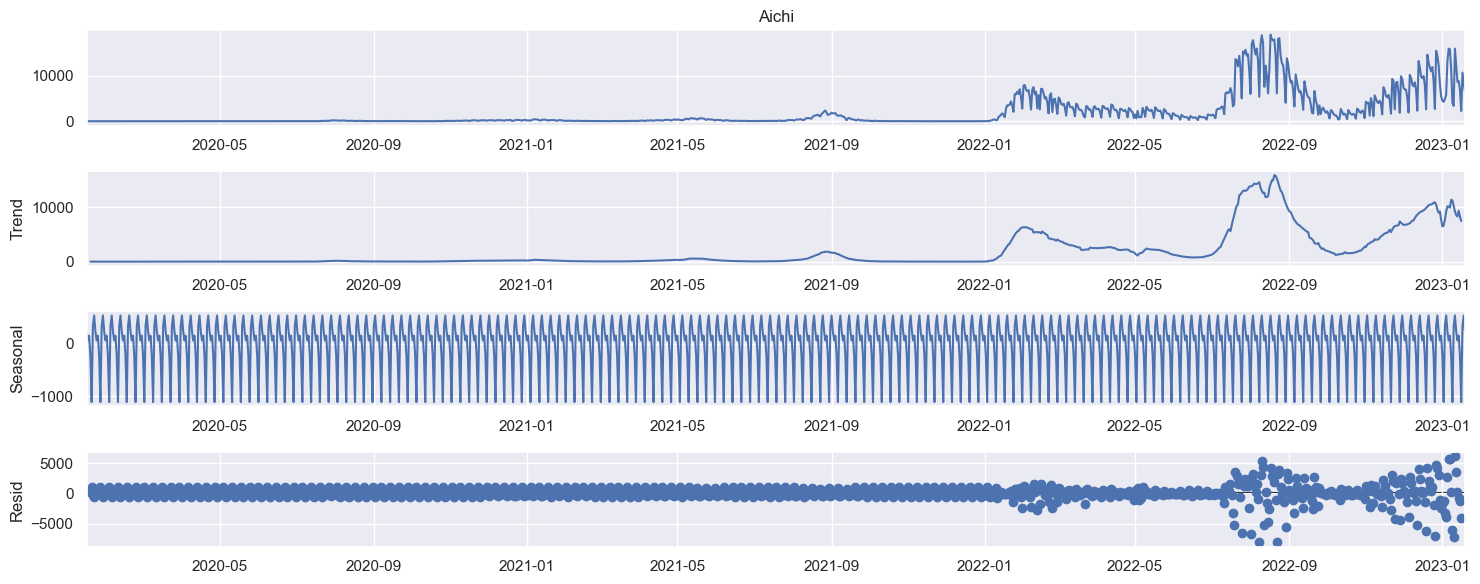

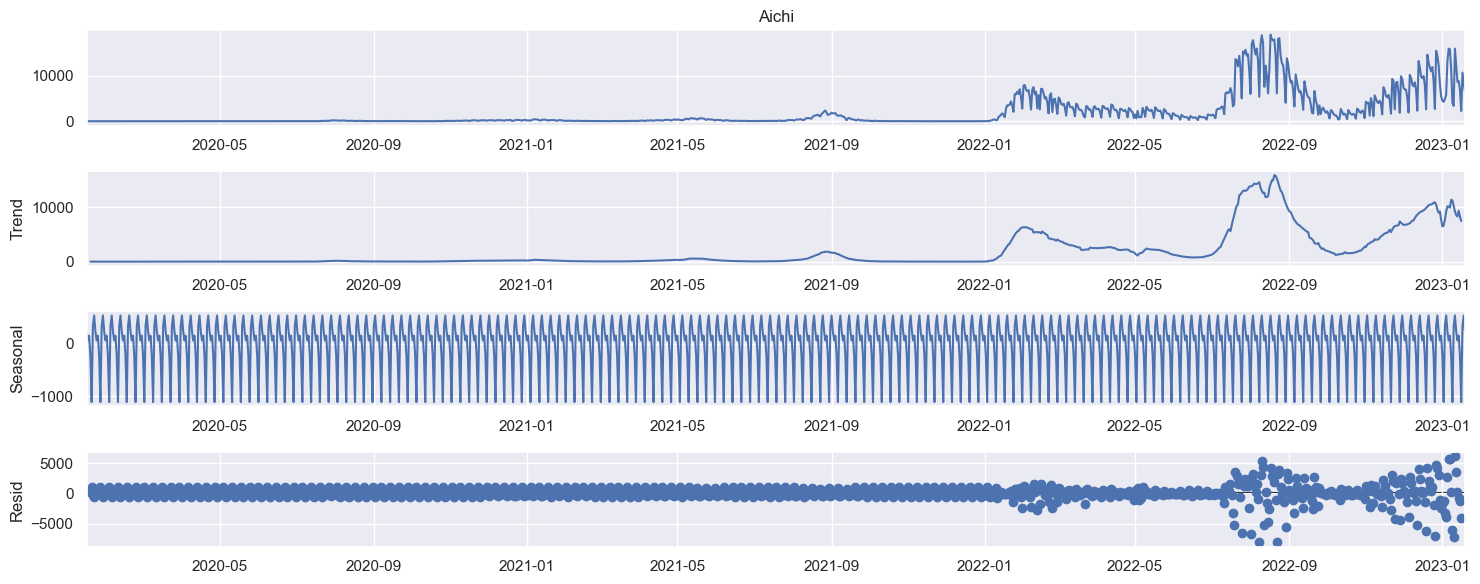

In [6]:
result = seasonal_decompose(data_aichi)
result.plot()

Seasonalから、なにかしら周期性が強く表れていることが読み取れる。\
Resid(誤差)からは、説明できない誤差が後半にかけて現れている。いわゆる第〇波といった影響だろう。

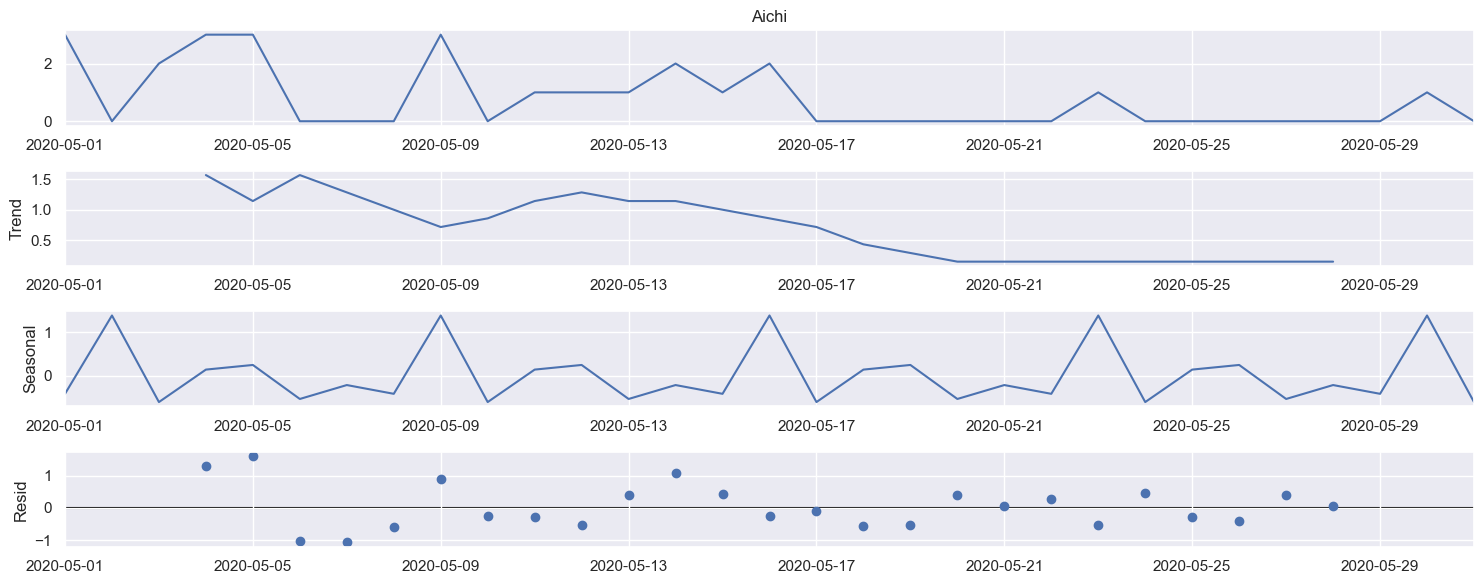

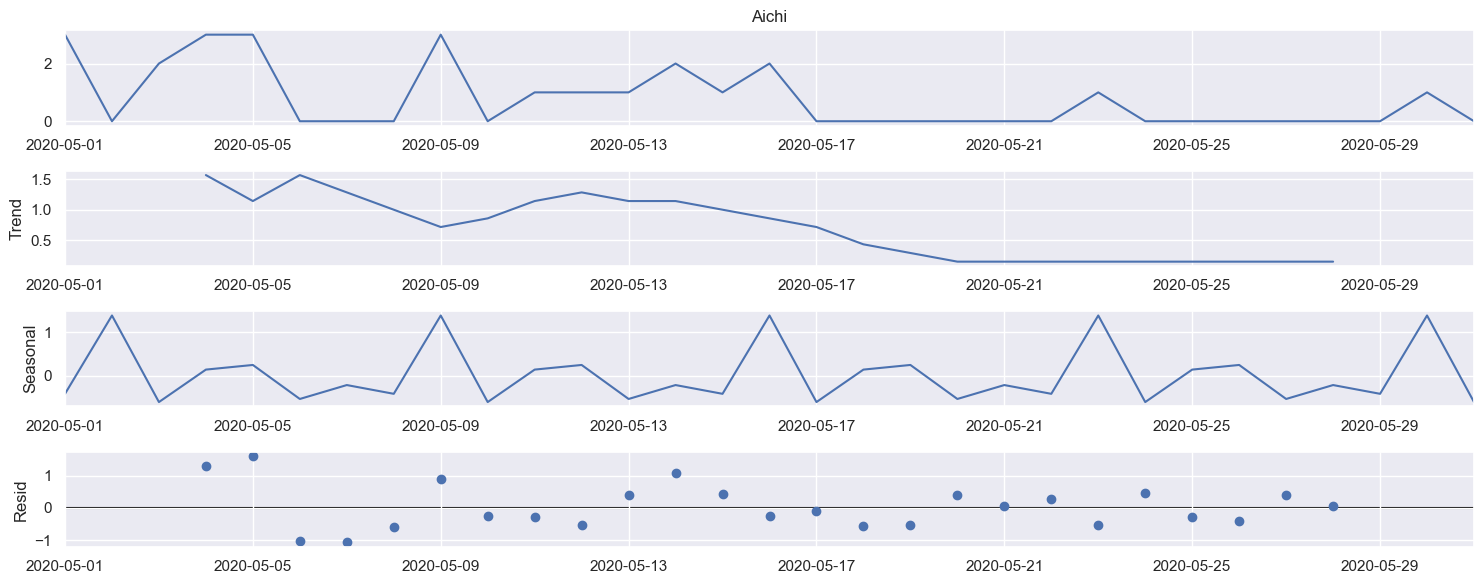

In [7]:
# Seasonalについて、もう少し狭い範囲でプロットして意味を探ってみる
result = seasonal_decompose(data_aichi['2020-05-1':'2020-05-31'])
result.plot()

おそらく、曜日による影響だろう。つまり7日周期で感染者数が推移している。

## 単位根検定
単位根があるかどうか検定し、モデルの選定をする

In [8]:
print('-----------原系列-----------')
nc = sm.tsa.stattools.adfuller(data_aichi, regression='n')
c = sm.tsa.stattools.adfuller(data_aichi, regression='c')
ct = sm.tsa.stattools.adfuller(data_aichi, regression='ct')
ctt = sm.tsa.stattools.adfuller(data_aichi, regression='ctt')

print('nc p-value:' + str(nc[1]))
print('c p-value:' + str(c[1]))
print('ct p-value:' + str(ct[1]))
print('ctt p-value:' + str(ctt[1]))

print()
print('--------一次階差系列---------')
data_diff = data_aichi.diff().dropna()

nc = sm.tsa.stattools.adfuller(data_diff, regression='n')
c = sm.tsa.stattools.adfuller(data_diff, regression='c')
ct = sm.tsa.stattools.adfuller(data_diff, regression='ct')
ctt = sm.tsa.stattools.adfuller(data_diff, regression='ctt')

print('nc p-value:' + str(nc[1]))
print('c p-value:' + str(c[1]))
print('ct p-value:' + str(ct[1]))
print('ctt p-value:' + str(ctt[1]))

-----------原系列-----------
nc p-value:0.003872087795768929
c p-value:0.008091196533622157
ct p-value:0.00010493691982162025
ctt p-value:1.6291175513369287e-05

--------一次階差系列---------
nc p-value:1.505903643220676e-07
c p-value:2.898127744662924e-06
ct p-value:3.081758923493408e-05
ctt p-value:0.00017411050116722496


この結果を見ると、元の系列データも単位根を持っていないといえる。\
しかしながら一次階差系列のほうが有意に帰無仮説を棄却できているため、ARIMAモデルを使うことにする。

## 次元探索

In [9]:
#まずはARMAモデルにて最適な次数を探索
params2 = sm.tsa.arma_order_select_ic(data_diff, ic='aic', trend='n')
params2

c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'aic':               0             1             2
 0  19491.383102  19213.231802  19144.230475
 1  19422.163478  19172.570233  19135.696580
 2  19250.029150  19124.523478  19076.955505
 3  19216.961013  19126.523199  19120.640755
 4  19212.066720  19112.180996  18912.931962,
 'aic_min_order': (4, 2)}

In [36]:
p = range(0,4)
d = range(0,4)
q = range(0,4)
pdg = list(itertools.product(p,d,q))

seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p,d,q))]

best_param_seasonal = [0,0,0,0]
best_bic = 999999

best_param = (4,1,2)

for param_seasonal in seasonal_pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(data_aichi, order=best_param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
        results = mod.fit()
        print('ARIMA{}x{}7 - BIC:{}'.format(best_param, param_seasonal, results.bic))

        if best_aic > results.bic:
            best_param_seasonal = param_seasonal
            best_aic = results.bic
    
    except:
        continue

print('*BEST ARIMA{}x{}7 - BIC:{}'.format(best_param, best_param_seasonal, best_bic))

ARIMA(4, 1, 2)x(0, 0, 0, 7)7 - BIC:19090.121215415853
ARIMA(4, 1, 2)x(0, 0, 1, 7)7 - BIC:18727.53848235262


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(0, 0, 2, 7)7 - BIC:18467.2334258738


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(0, 0, 3, 7)7 - BIC:18344.40615604882
ARIMA(4, 1, 2)x(0, 1, 0, 7)7 - BIC:18722.9161909662


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(0, 1, 1, 7)7 - BIC:18335.880353823937


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(0, 1, 2, 7)7 - BIC:18286.403271962175


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(0, 1, 3, 7)7 - BIC:18534.549639365738
ARIMA(4, 1, 2)x(0, 2, 0, 7)7 - BIC:19590.467508170623
ARIMA(4, 1, 2)x(0, 2, 1, 7)7 - BIC:34539.225644072496


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(0, 2, 2, 7)7 - BIC:31813.07070167703


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(0, 2, 3, 7)7 - BIC:33005.487262337556
ARIMA(4, 1, 2)x(0, 3, 0, 7)7 - BIC:20580.88284632492


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(0, 3, 1, 7)7 - BIC:26223.42198764988


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(0, 3, 2, 7)7 - BIC:27622.854682705445


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(0, 3, 3, 7)7 - BIC:27783.136732736348
ARIMA(4, 1, 2)x(1, 0, 0, 7)7 - BIC:18477.727417532675


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(1, 0, 1, 7)7 - BIC:18441.744561904336


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(1, 0, 2, 7)7 - BIC:18304.665123302235


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(1, 0, 3, 7)7 - BIC:18191.70470515332


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(1, 1, 0, 7)7 - BIC:18409.989763487327


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(1, 1, 1, 7)7 - BIC:18608.070999937183


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(1, 1, 2, 7)7 - BIC:18528.5138483622


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(1, 1, 3, 7)7 - BIC:18293.39948137031


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(1, 2, 0, 7)7 - BIC:31099.197546814845


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(1, 2, 1, 7)7 - BIC:30482.22448483095


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(1, 2, 2, 7)7 - BIC:32927.02351753703
ARIMA(4, 1, 2)x(1, 2, 3, 7)7 - BIC:33972.25819289235


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(1, 3, 0, 7)7 - BIC:nan


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(1, 3, 1, 7)7 - BIC:25825.486446517098


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(1, 3, 2, 7)7 - BIC:nan


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(1, 3, 3, 7)7 - BIC:29093.6967948003


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(2, 0, 0, 7)7 - BIC:18284.308671377767


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(2, 0, 1, 7)7 - BIC:18289.814261137974


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(2, 0, 2, 7)7 - BIC:18296.675534120866


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(2, 0, 3, 7)7 - BIC:18213.587353686693


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(2, 1, 0, 7)7 - BIC:18219.90351861368


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(2, 1, 1, 7)7 - BIC:18323.54367154868


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(2, 1, 2, 7)7 - BIC:22593.72560983233


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(2, 1, 3, 7)7 - BIC:23907.55671164803


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(2, 2, 0, 7)7 - BIC:30573.533344796313
ARIMA(4, 1, 2)x(2, 2, 1, 7)7 - BIC:33189.9398420355


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(2, 2, 2, 7)7 - BIC:34121.11515975348


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(2, 2, 3, 7)7 - BIC:33249.701115756645


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(2, 3, 0, 7)7 - BIC:25850.461760291804


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(2, 3, 1, 7)7 - BIC:26418.160161879285


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(2, 3, 2, 7)7 - BIC:27708.68025100872


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(2, 3, 3, 7)7 - BIC:27900.63150891757


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(3, 0, 0, 7)7 - BIC:18172.52895229299


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(3, 0, 1, 7)7 - BIC:18183.20439659886


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(3, 0, 2, 7)7 - BIC:18169.639333997075


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(3, 0, 3, 7)7 - BIC:18206.229257804855


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(3, 1, 0, 7)7 - BIC:18104.633818815713


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(3, 1, 1, 7)7 - BIC:18101.436221594988


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(3, 1, 2, 7)7 - BIC:24169.959733724005


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(3, 1, 3, 7)7 - BIC:24945.498628231864


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(3, 2, 0, 7)7 - BIC:31141.44632529303


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(3, 2, 1, 7)7 - BIC:31424.86331669438
ARIMA(4, 1, 2)x(3, 2, 2, 7)7 - BIC:33941.455912014346


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(3, 2, 3, 7)7 - BIC:33888.03406456907


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(3, 3, 0, 7)7 - BIC:nan
ARIMA(4, 1, 2)x(3, 3, 1, 7)7 - BIC:29345.996093773203


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(3, 3, 2, 7)7 - BIC:27424.06810519848


c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2)x(3, 3, 3, 7)7 - BIC:29115.808982572442
*BEST ARIMA(4, 1, 2)x[0, 0, 0, 0]7 - BIC:999999


## モデル作成・予測

In [19]:
#データ分割
train_data = data_aichi[:'2022-12-31']

In [38]:
sarima_model = sm.tsa.SARIMAX(train_data, order=(4,1,2), seasonal_order=(3,1,1,7), enforce_invertibility=False, enforce_stationarity=False)
result = sarima_model.fit()

result.summary()

c:\Users\ayumi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Aichi   No. Observations:                 1081
Model:             SARIMAX(4, 1, 2)x(3, 1, [1], 7)   Log Likelihood               -8620.991
Date:                             Fri, 20 Jan 2023   AIC                          17263.982
Time:                                     09:58:42   BIC                          17318.483
Sample:                                 01-16-2020   HQIC                         17284.649
                                      - 12-31-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5052      0.020    -24.936      0.000      -0.545      -0.465
ar.L2          0.6398      0.025     25.130      0.000       0.590       0.690
ar.L3          0.3846      0.016     23.893      0.000       0.353       0.416
ar.L4          0.2194      0.020     11.138      0.000       0.181       0.258
ma.L1          0.0381      0.018      2.062      0.039       0.002       0.074
ma.L2         -1.0369      0.018    -57.045      0.000      -1.072      -1.001
ar.S.L7       -0.2913      0.376     -0.775      0.438      -1.028       0.446
ar.S.L14      -0.0882      0.159     -0.554      0.579      -0.400       0.224
ar.S.L21      -0.0340      0.057     -0.600      0.549      -0.145       0.077
ma.S.L7       -0.1441      0.378     -0.382      0.703      -0.884       0.596
sigma2      9.032e+05   3.39e+04     26.649      0.000    8.37e+05     9.7e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.37   Jarque-Bera (JB):             31402.79
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):            3102.45   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
best_pred = result.predict(start='2022-01-01', end='2023-12-31')

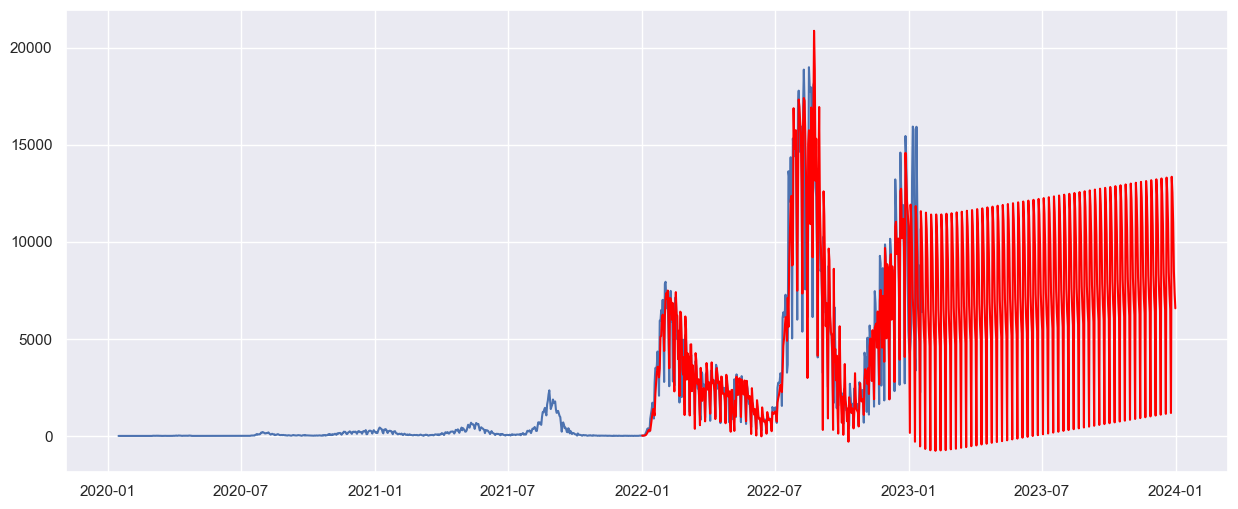

In [40]:
plt.plot(data_aichi, c='b')
plt.plot(best_pred, c='red')
plt.show()

これをみると、直前の傾向はしっかり反映できているとわかる。しかし、性質上直近の情報を参考にするため、少しさきの未来の予測には使えるが、長期的な予測はむずかしいだろう。\
長期的な予測をするのであれば、長期的な季節周期を学習させればよいと考えるが、計算コストが非常に高いため、実用的ではない。\
SARIMAXの良いところは、すくないデータの量で学習ができるところ。だからこそ、予測も季節周期に合わせた範囲で行うべき。

## 精度を図る

周期が7日なので、予測は28日程度に抑えておき、精度を図る。

In [49]:
from sklearn.metrics import mean_absolute_error

In [41]:
result_pred = best_pred['2023-01-01':'2023-01-14']
result_true = data_aichi['2023-01-01':'2023-01-14']

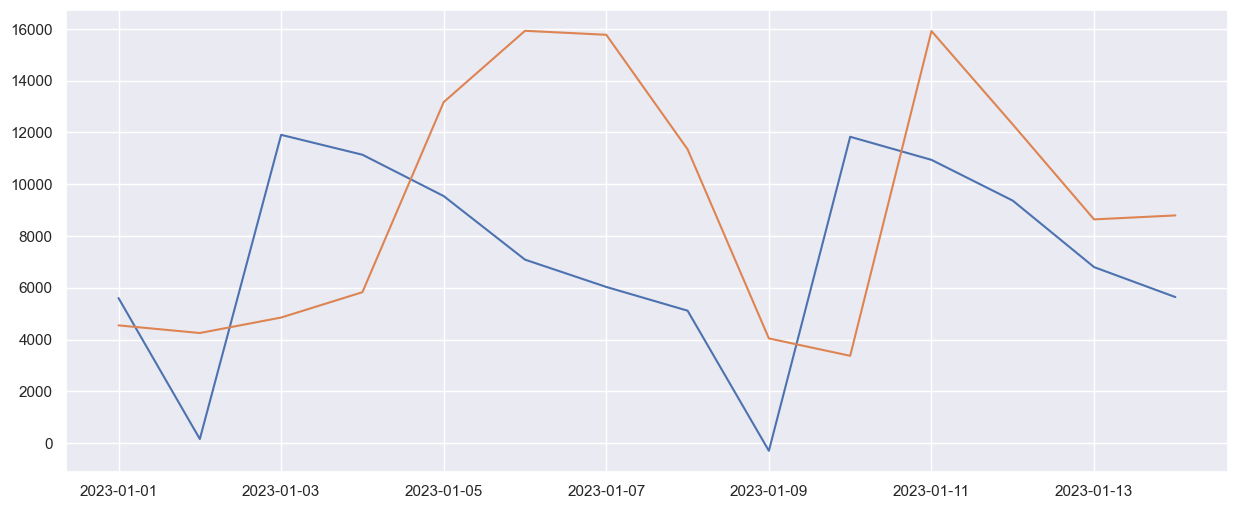

In [48]:
plt.plot(result_pred)
plt.plot(result_true)
plt.show()

In [50]:
mean_absolute_error(y_true=result_true, y_pred=result_pred)

5120.821354201782

今回の予測範囲は第n波（コロナが流行する時期）の収束する真っ只中であり、SARIMAでは予測は難しいのだと予想。\
より正確に予測するなら、流行の開始、収束を示唆する何かしらの説明変数があれば、SARIMAXとして予測性能は向上するのではないか、と考える。\
流行にも周期性があるとしたら、複数の周期変動を扱えるprophet, TBATsといった数理モデルを活用するのも手だろう。

## 予測範囲を変えて予測

In [44]:
train_data2 = data_aichi[:'2022-04-30']
test_data2 = data_aichi['2022-05-01':'2022-05-14']

In [46]:
predict2 = result.predict('2022-05-01','2022-05-14')

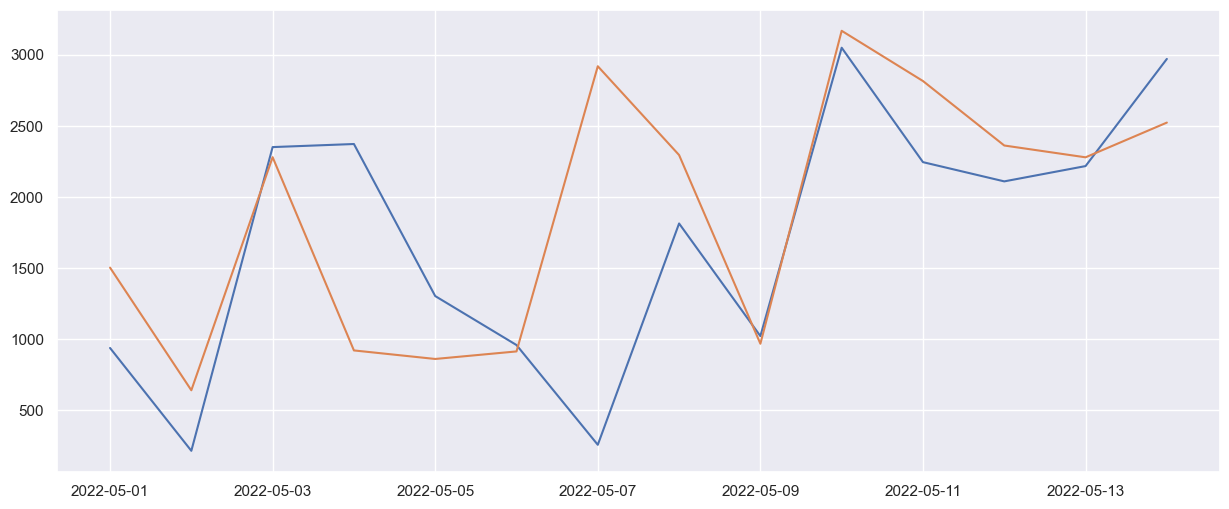

In [47]:
plt.plot(predict2)
plt.plot(data_aichi['2022-05-01':'2022-05-14'])
plt.show()

In [51]:
mean_absolute_error(y_true=data_aichi['2022-05-01':'2022-05-14'], y_pred=predict2)

545.9289617076762

第n波という周期性と関係ない区間を選んで予測すると、精度はかなりよくなった。